In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#import the countries data from the csv file with an index column of countries
df_morn = pd.read_csv("./week_testing/samantha_data.csv")
df_morn.info()

#create columns for counts
counts_1_3 = df_morn['Chan_0_1']
counts_2_3 = df_morn['Chan_0_2']
counts_1_2 = df_morn['Chan_1_2']

timestamps = df_morn['timestamp'].values
print(type(timestamps))
print(df_morn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chan_0_1   1546 non-null   int64 
 1   Chan_0_2   1546 non-null   int64 
 2   Chan_1_2   1546 non-null   int64 
 3   timestamp  1546 non-null   object
dtypes: int64(3), object(1)
memory usage: 48.4+ KB
<class 'numpy.ndarray'>
      Chan_0_1  Chan_0_2  Chan_1_2                  timestamp
0            4         4        12   Wed Mar 29 15:19:06 2023
1            6         8        16   Wed Mar 29 15:20:06 2023
2            9         5         8   Wed Mar 29 15:21:06 2023
3            5        49         9   Wed Mar 29 15:22:06 2023
4            5        49        13   Wed Mar 29 15:23:06 2023
...        ...       ...       ...                        ...
1541         3         0         9   Thu Mar 30 17:28:33 2023
1542         4         1         6   Thu Mar 30 17:29:33 2023
1543         1         1   

In [3]:
df_morn.dropna(inplace=True)

In [4]:
df_morn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chan_0_1   1546 non-null   int64 
 1   Chan_0_2   1546 non-null   int64 
 2   Chan_1_2   1546 non-null   int64 
 3   timestamp  1546 non-null   object
dtypes: int64(3), object(1)
memory usage: 48.4+ KB


In [5]:
df_morn['timestamp'] = pd.to_datetime(df_morn['timestamp'])
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,4,4,12,2023-03-29 15:19:06
1,6,8,16,2023-03-29 15:20:06
2,9,5,8,2023-03-29 15:21:06
3,5,49,9,2023-03-29 15:22:06
4,5,49,13,2023-03-29 15:23:06


In [6]:
df_morn.sort_values(by='timestamp', ascending=True, inplace=True)
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,4,4,12,2023-03-29 15:19:06
1,6,8,16,2023-03-29 15:20:06
2,9,5,8,2023-03-29 15:21:06
3,5,49,9,2023-03-29 15:22:06
4,5,49,13,2023-03-29 15:23:06


In [7]:
df_morn_counts = df_morn[['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2']]
df_morn_counts.columns

Index(['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2'], dtype='object')

In [8]:
df_morn_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1546 entries, 0 to 1545
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1546 non-null   datetime64[ns]
 1   Chan_0_1   1546 non-null   int64         
 2   Chan_0_2   1546 non-null   int64         
 3   Chan_1_2   1546 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 60.4 KB


In [9]:
df_morn_counts = df_morn_counts.resample('H', on = 'timestamp', axis=0).mean()
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2023-03-29 15:00:00,6.195122,22.292683,12.048780
2023-03-29 16:00:00,68.586957,9.000000,13.869565
2023-03-29 17:00:00,152.083333,5.433333,14.216667
2023-03-29 18:00:00,155.483333,5.800000,15.700000
2023-03-29 19:00:00,154.466667,5.733333,15.566667


In [10]:
#df_morn_counts= df_morn.interpolate(method='linear', limit_direction='both')  
#df_morn_counts.drop_duplicates(inplace=True)

#df_morn_counts.head(20)

Text(0.5, 1.0, 'March 18 Morning Individualized Counts')

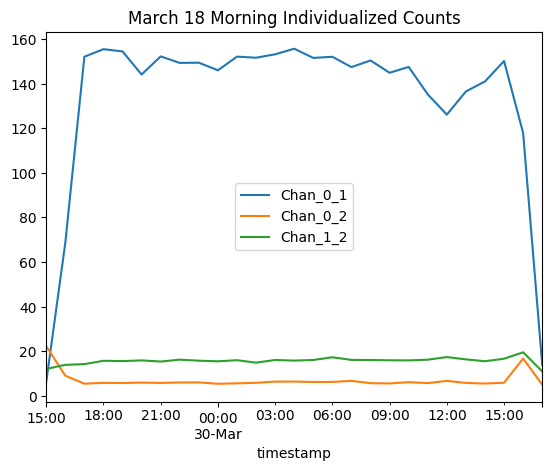

In [11]:
df_morn_counts.plot()
plt.title('March 18 Morning Individualized Counts')

In [12]:
df_morn_counts['average'] = df_morn_counts[['Chan_0_1', 'Chan_0_2', 'Chan_1_2']].mean(axis=1)
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2,average
timestamp,,,,
2023-03-29 15:00:00,6.195122,22.292683,12.048780,13.512195
2023-03-29 16:00:00,68.586957,9.000000,13.869565,30.485507
2023-03-29 17:00:00,152.083333,5.433333,14.216667,57.244444
2023-03-29 18:00:00,155.483333,5.800000,15.700000,58.994444
2023-03-29 19:00:00,154.466667,5.733333,15.566667,58.588889


Text(0.5, 1.0, 'Samantha Office March 29 to March 30')

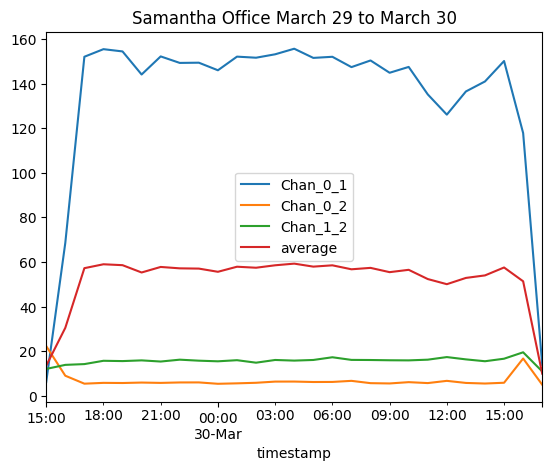

In [13]:
df_morn_counts.plot()
plt.title('Samantha Office March 29 to March 30')
#plt.ylim(0, 150)

Text(0.5, 1.0, 'March 18 Morning Average Counts')

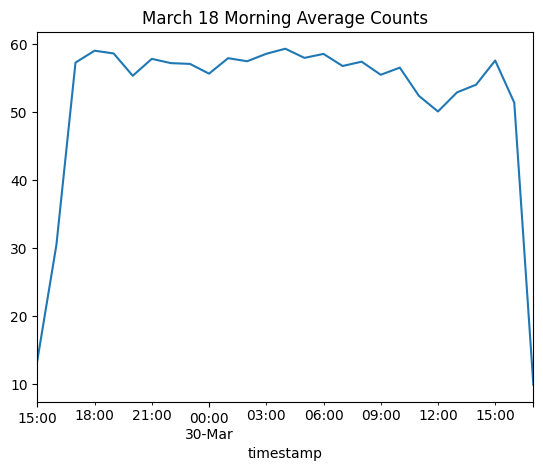

In [14]:
df_morn_counts['average'].plot()
plt.title('March 18 Morning Average Counts')